In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats

Welcome to JupyROOT 6.18/04


In [2]:
# Reload stuff in case you make changes!

importlib.reload(spliland);

### Just make and display one island

In [3]:
f = r.TFile("./calotemplate15.root")
noiseDict = fclParse.fclReader("gm2pedestals_run3formatRE.fcl")
enCalDict = fclParse.fclReader("mipEnergyCalibration_PostDisk_CoincidencNumber_2.fcl")

The number of pulses in this island: 3
The energy scale factors are: [ 5087.19  2759.36  4068.05 ] ADC units
The time offsets are: [ 1.89  9.63  13.72 ] ns
The artificial minimum time offset is: 0.00 ns
Sampling this spline with a deltaT of 1.25 ns
The noise level standard deviation in this island: 3.07
Spline template crystal number: 46
Spline template peak: 0.24
Crystal energy calibration constant: 0.17
Pulse integral: 49369.58
'Q-Method-ish' Island 'total' energy: 8200.29 MeV


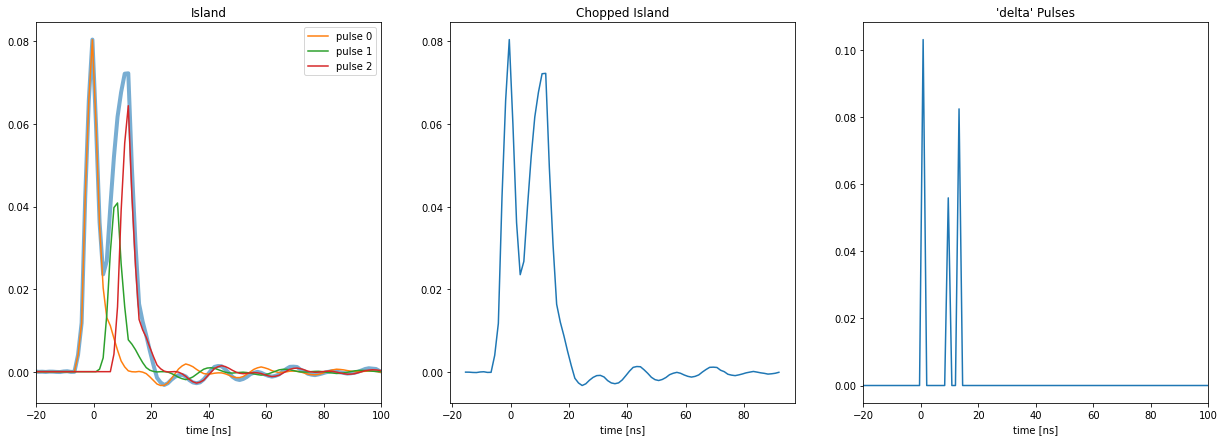

In [4]:
xtalNum = str(np.random.randint(low=0, high=54))

thisSpline = spliland.Spline(f.Get("masterSpline_xtal" + xtalNum), xtalNum, 15)
thisNoise = noiseDict['pedestalConstantsLaserRun3']['calo15']['xtal' + xtalNum]['noiseLevel']
thisEnCal = enCalDict['absolute_calibration_constants']['calo15']['xtal' + xtalNum]

testIsland = spliland.Island(referenceSpline=thisSpline,
                             minPulses = 1, maxPulses = 4,
                             useUniformEscale = False,
                             energyCalibrationVal = thisEnCal,
                             energyPeak = 0, energyScale = 600,
                             minEscale = 1, maxEscale=1,
                             deltaTmin=0, deltaTmax=25,
                             minTimeOffset=0,
                             verbosity=True,
                             normalize=True,
                             chop = True,
                             chopThreshold = 50,
                             nPreSamples = 8, nPostSamples = 18,
                             noise=True, noiseLevel=thisNoise,
                             randomizeTailLength=False)

fig, ax = plt.subplots(1,3);
fig.set_size_inches(21,7);

start_lim = -20
end_lim = 100

ax[0].plot(testIsland.time, testIsland.yValues, linewidth=4, alpha=0.6);
for n, pulse in enumerate(testIsland.pulses):
    ax[0].plot(testIsland.time, pulse, label='pulse {0}'.format(n))
ax[1].plot(testIsland.choppedTime, testIsland.choppedYValues, markersize=3);
ax[2].plot(testIsland.time, testIsland.simple_ys)

ax[0].set_title("Island")
ax[1].set_title("Chopped Island")
ax[2].set_title("'delta' Pulses")
ax[0].set_xlabel("time [ns]")
ax[1].set_xlabel("time [ns]")
ax[2].set_xlabel("time [ns]")
ax[0].set_xlim(start_lim, end_lim);
ax[2].set_xlim(start_lim, end_lim);

ax[0].legend()

#plt.savefig('./template_data/set_4/figures/demo.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(thisSpline.time, thisSpline.splineY)
ax.set_xlim(-10, 25)

### Make a bunch of islands to make sure it doesn't take a million years to do more than one

In [96]:
for index in range(0, 10000):
    testIsland = spliland.Island(referenceSpline=spline0,
                             deltaTmin=0, deltaTmax=25,
                             minTimeOffset=4.5,
                             verbosity=False, noise=True, randomizeTailLength=False)
    if(index % 1000 == 0): print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
